# Support Vector Machines

## Setup

In [3]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Support-Vector-Machines"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Support-Vector-Machines


In [5]:
!pip install -r requirements.txt

  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached matplotlib-3.8.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.12.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (217 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadat

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [18]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Train SVM classifier

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42, dual=True))

svm_clf.fit(X.values, y)
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [103]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

## Decision Boundary

In [104]:
from sklearn.svm import SVC

X = X[(iris.target == 0) | (iris.target == 1)]
y = iris.target[(iris.target == 0) | (iris.target == 1)]


svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X.values, y)

SVC(C=1e+100, kernel='linear')

In [106]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0, 5.5, 500)
decision_boundary = -w[0] / w[1] * x0 - b / w[1]
margin = 1/w[1]
support_vectors = svm_clf.support_vectors_
support_vectors

array([[1.9, 0.4],
       [3. , 1.1]])

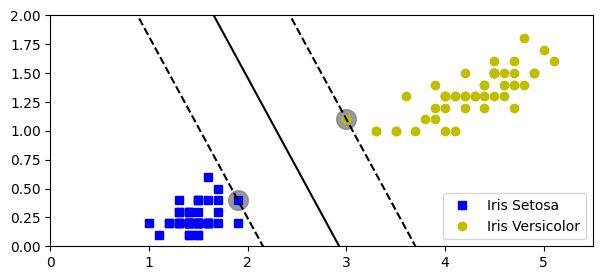

In [121]:
plt.figure(figsize=(7, 3))
plt.plot(X["petal length (cm)"][y==0], X["petal width (cm)"][y==0], "bs", label="Iris Setosa")
plt.plot(X["petal length (cm)"][y==1], X["petal width (cm)"][y==1], "yo", label="Iris Versicolor")
plt.plot(x0, decision_boundary, "k")
plt.plot(x0, decision_boundary - margin, "k--")
plt.plot(x0, decision_boundary + margin, "k--")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, c="grey", alpha=0.8,zorder=-1)
plt.axis([0, 5.5, 0, 2])
plt.legend(loc="lower right")
plt.show()